In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout , Activation , Flatten , Conv2D , MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard , ModelCheckpoint
tf.set_random_seed(1)
%run DataUtilsModule.ipynb

Using TensorFlow backend.


<h2>Already Save The Data No Need To Call The Cell Again</h2>

In [73]:
# utl = utils()

# X_train,X_test,Y_train,Y_test,X_dev,Y_dev  = utl.load_data(5 ,img_size=100 , batch_size=400) 
# #totalClasses,img_size=50,data_path='../data/input' , batch_size=False, #trainPer=80
# X_train = utl.convert2RGB(X_train)
# X_test = utl.convert2RGB(X_test)
# X_dev = utl.convert2RGB(X_dev)

In [74]:
# print(X_train.shape)
# print(Y_train.shape)

# print(X_test.shape)
# print(Y_test.shape)

# print(X_dev.shape)
# print(Y_dev.shape)

(1600, 100, 100, 3)
(1600,)
(200, 100, 100, 3)
(200,)
(200, 100, 100, 3)
(200,)


In [75]:
# utl.save_data('retrivedX_TestData' , X_test)
# utl.save_data('retrivedX_TrainData' , X_train)
# utl.save_data('retrivedY_TestData' , Y_test)
# utl.save_data('retrivedY_TrainData' , Y_train)
# utl.save_data('retrivedX_DevData' , X_dev)
# utl.save_data('retrivedY_DevData' , Y_dev)

<h2>Loading Saved Data</h2>

In [4]:
utl = utils()

# X_test = utl.load_saved_data('X_Test')/255
# X_train = utl.load_saved_data('X_Train')/255
# Y_test = utl.load_saved_data('Y_Test')
# Y_train = utl.load_saved_data('Y_Train')
# X_dev = utl.load_saved_data('X_Dev')/255
# Y_dev = utl.load_saved_data('Y_Dev')

[X_train , X_test , X_dev , Y_train , Y_test , Y_dev] = utils.load_saved_data()

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

print(X_dev.shape)
print(Y_dev.shape)

(1600, 100, 100, 3)
(1600,)
(200, 100, 100, 3)
(200,)
(200, 100, 100, 3)
(200,)


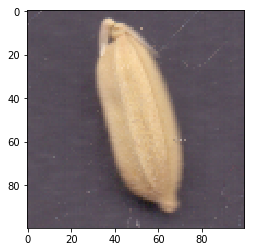

In [3]:
plt.imshow(X_train[0])

<h2>Quick and Rough Model Using Keras</h2>

In [4]:
#Create A Model

model = Sequential([
    #Layer 1                    
    Conv2D(filters=8 , kernel_size=(4,4) , input_shape = X_train.shape[1:]),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.3),
    
    #Layers 2
    Conv2D(filters=16 , kernel_size=(4,4) , padding='SAME'),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2) , padding='same'),
#     Dropout(0.2),
    
    #Layer 3
    Conv2D(filters=32 , kernel_size=(4,4) , padding='SAME'),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2) , padding='same'),
    Dropout(0.3),
    
    #Layer 4
    Conv2D(filters=32 , kernel_size=(4,4)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),
    
    #Layer 5
    Conv2D(filters=64 , kernel_size=(4,4)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2,2) , padding='same'),
    Dropout(0.4),
    
    #Layer 6
    Flatten(),
    
    #Layer 7
    Dense(128),
    Activation("relu"),
    
    #Layer 8
    Dense(64),
    Activation("relu"),

    #Layer 9
    Dense(5),
    Activation("softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ['accuracy']
             )

model.fit( X_train 
          ,Y_train 
          ,epochs=100
          ,batch_size=64
          ,validation_data = (X_dev , Y_dev))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 1600 samples, validate on 200 samples
Epoch 1/100
1600/1600 [==============================] - 19s 12ms/sample - loss: 1.6107 - acc: 0.1969 - val_loss: 1.6090 - val_acc: 0.2000
Epoch 2/100
1600/1600 [==============================] - 20s 12ms/sample - loss: 1.6093 - acc: 0.2075 - val_loss: 1.6081 - val_acc: 0.2000
Epoch 3/100
1600/1600 [==============================] - 19s 12ms/sample - loss: 1.6080 - acc: 0.2219 - val_loss: 1.6044 - val_acc: 0.1950
Epoch 4/100
1600/1600 [==============================] - 19s 12ms/sample - loss: 1.6088 - acc: 0.2081 - val_loss: 1.6029 - val_acc: 0.2200
Epoch 5/100
1600/1600 [==============================] - 19s 12ms/sample - loss: 1.5892 - acc: 0.2537 - val_loss: 1.5734 - val_acc: 0.3850
Epoch 6/100
1600/1600 [==============================] - 19s 12ms/sampl

In [5]:
prediction = model.predict(X_test)
prediction.argmax(axis=1)


array([1, 4, 1, 0, 0, 0, 2, 3, 3, 0, 0, 0, 1, 0, 3, 4, 3, 1, 1, 4, 1, 3,
       2, 2, 0, 1, 0, 4, 4, 1, 4, 2, 1, 0, 2, 0, 2, 2, 4, 4, 1, 2, 2, 0,
       1, 3, 3, 1, 0, 2, 3, 0, 3, 0, 0, 0, 4, 3, 0, 0, 1, 2, 4, 2, 3, 4,
       3, 2, 1, 0, 3, 4, 4, 0, 4, 0, 2, 2, 0, 3, 0, 2, 1, 2, 1, 4, 0, 0,
       2, 2, 3, 1, 4, 1, 1, 3, 0, 4, 0, 0, 0, 2, 2, 3, 0, 1, 0, 2, 1, 4,
       3, 4, 3, 2, 2, 3, 4, 4, 1, 3, 4, 2, 3, 1, 1, 3, 4, 1, 2, 1, 3, 2,
       4, 1, 2, 1, 0, 2, 2, 4, 1, 0, 1, 0, 3, 1, 4, 0, 3, 2, 1, 4, 0, 0,
       2, 2, 0, 4, 1, 0, 0, 3, 1, 0, 0, 3, 3, 4, 4, 2, 2, 2, 4, 0, 3, 4,
       0, 1, 0, 2, 1, 1, 2, 1, 3, 1, 0, 3, 0, 2, 0, 1, 3, 2, 2, 0, 4, 3,
       0, 3])

In [6]:
Y_test

array([1, 4, 1, 0, 4, 4, 2, 3, 3, 0, 4, 0, 1, 0, 3, 4, 3, 1, 1, 4, 1, 3,
       2, 2, 0, 1, 0, 4, 0, 1, 0, 2, 1, 4, 2, 0, 2, 2, 4, 4, 1, 2, 2, 0,
       1, 3, 3, 1, 0, 2, 3, 3, 3, 0, 0, 0, 4, 3, 0, 4, 1, 2, 0, 2, 3, 4,
       3, 2, 1, 4, 3, 4, 4, 0, 4, 0, 2, 2, 4, 3, 0, 2, 1, 2, 1, 4, 0, 4,
       2, 2, 3, 1, 4, 1, 1, 3, 0, 4, 4, 0, 2, 2, 2, 3, 0, 1, 4, 2, 1, 4,
       3, 4, 3, 3, 2, 3, 4, 0, 1, 3, 4, 3, 3, 1, 1, 3, 4, 1, 2, 1, 3, 2,
       0, 1, 2, 1, 0, 2, 2, 4, 1, 0, 1, 0, 3, 1, 4, 0, 3, 2, 1, 4, 0, 0,
       2, 2, 4, 4, 1, 0, 0, 3, 1, 0, 0, 3, 3, 4, 4, 2, 2, 2, 4, 4, 3, 4,
       2, 1, 0, 2, 1, 1, 2, 1, 3, 1, 0, 3, 3, 2, 3, 1, 3, 4, 2, 0, 0, 3,
       0, 3])

In [7]:
print(sum(prediction.argmax(axis=1) == Y_test)/Y_test.size * 100, "% Accuracy On Test Set")

87.0 % Accuracy On Test Set


<h2>Model Using TensorFlow<h2>

In [140]:
%run models.ipynb
# import import_ipynb
# import models

In [141]:
model = cnn()

../data/CheckPoints/last_model.txt
INFO:tensorflow:Restoring parameters from ../data/CheckPoints/my-model-9-69.33%/69.333%
Cost after Epoch 1: 6.694320 => Training Acc : 0.665000 => Dev Acc : 0.546667 => Test Acc : 0.626667 
Cost after Epoch 2: 6.658490 => Training Acc : 0.786667 => Dev Acc : 0.720000 => Test Acc : 0.693333 *
Cost after Epoch 3: 5.656879 => Training Acc : 0.753333 => Dev Acc : 0.666667 => Test Acc : 0.773333 
Cost after Epoch 4: 5.990747 => Training Acc : 0.766667 => Dev Acc : 0.680000 => Test Acc : 0.760000 
Cost after Epoch 5: 5.103332 => Training Acc : 0.780000 => Dev Acc : 0.653333 => Test Acc : 0.733333 
Cost after Epoch 6: 5.079866 => Training Acc : 0.776667 => Dev Acc : 0.653333 => Test Acc : 0.773333 
Cost after Epoch 7: 4.819659 => Training Acc : 0.806667 => Dev Acc : 0.666667 => Test Acc : 0.813333 
Cost after Epoch 8: 4.982584 => Training Acc : 0.806667 => Dev Acc : 0.653333 => Test Acc : 0.800000 
Cost after Epoch 9: 5.372106 => Training Acc : 0.750000 => D

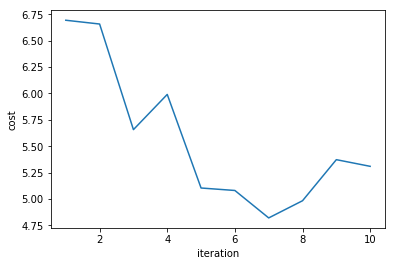

In [143]:
model.fit()